<div style="text-align: center; color: black;">
    <h1>🔍 HR Data Analysis and Visualization: Solving 10 Key Business Problems</h1>
</div>

### 🧠 2. HR Data Preprocessing (Python + MySQL)

This section focuses on loading employee data from the MySQL database into pandas for downstream cleaning, merging, and transformation.

We'll begin by securely retrieving database credentials, connecting to the MySQL server, and preparing the environment for data extraction and wrangling.

#### 📋 2.1 Employee Table: MySQL to pandas DataFrame

We start by importing essential libraries and retrieving the employee dataset from the `hr_employee` MySQL database. This table serves as the foundation for further analysis — capturing personal, departmental, and employment metadata.

In [1]:
# Import libraries for MySQL connectivity and data manipulation
import mysql.connector       # Direct connection for executing queries
import pandas as pd          # Used for handling tabular data (DataFrame structure)

In [2]:
import os

# Retrieve MySQL password from environment variable to avoid hardcoding sensitive data
mysql_password = os.getenv("MySQL_Password")

# Check whether the password was retrieved successfully
if mysql_password is None:
    # Notify if environment variable is not set
    print("Password not found in environment variables!")
else:
    # Confirm successful retrieval (without exposing the password)
    print("Password retrieved successfully!")

Password retrieved successfully!


In [3]:
# Import additional database handling modules
import pymysql                      # Compatibility layer for SQLAlchemy with MySQL
from sqlalchemy import create_engine  # Enables connection pooling and pandas-to-MySQL integration

#### 🌐 2.2 Connect to MySQL & Load Employee Data
We establish a secure connection to the MySQL database using SQLAlchemy, ensuring password safety through URL encoding. Once connected, we extract the full employee table and convert it into a pandas DataFrame. <br>
Initial inspection is performed via `.shape`, `.columns`, `.info()`, `.isnull().sum()`, and `.duplicated().sum()` to assess data quality, structure, and readiness for transformation.

In [4]:
from urllib.parse import quote_plus  # Used to safely encode special characters in the password

In [5]:
# Define credentials and connection parameters
username = "root"
raw_password = mysql_password               # Retrieved from environment variable
password = quote_plus(raw_password)         # Encoded to safely use in SQLAlchemy URI
host = "localhost"
port = 3306
database = "hr_synthetic"

# Create SQLAlchemy engine for streamlined data access
engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

In [6]:
# Define query to extract employee records
query = "SELECT * FROM employees"
# Load data into a pandas DataFrame
df_emp = pd.read_sql(query, con=engine)
# Quick preview of the dataset
df_emp.head()

,employee_id,name,age,gender,marital_status,ethnicity,country,job_role_id,department_id,hire_date,salary
0,1,James Tapia,38,Male,Married,Black,India,2,1,2018-12-08,79934.28
1,2,Vincent Smith,55,Male,Single,Native American,Nigeria,44,7,2019-03-14,67234.71
2,3,Christopher Key,26,Male,Married,Black,Japan,2,1,2024-01-29,82953.77
3,4,Craig Burke,33,Male,Other,Mixed,Italy,36,6,2016-10-19,100460.60
4,5,Lisa Rodriguez,49,Female,Widowed,Asian,South Korea,15,3,2022-07-23,65316.93


#### 🔍 2.3 Assess and Standardize Employee Dataset

We perform basic data quality checks:
- Dimensions (`.shape`)
- Column names (`.columns`)
- Data types (`.info()`)
- Missing values (`.isnull().sum()`)
- Duplicates (`.duplicated().sum()`)

We then standardize key categorical features:
- `gender`: formatted with initial capitalization
- `marital_status`, `ethnicity`, `country`: converted to title case
- `hire_date`: parsed into datetime format

We also derive important analytical columns:
- `tenure_days` and `tenure_years`: calculated from hire date to today
- `age_group`: binned into meaningful ranges using a custom function

##### **Review dataset shape, column names, and summary info**

In [7]:
df_emp.shape

(5000, 11)

In [8]:
df_emp.columns

Index(['employee_id', 'name', 'age', 'gender', 'marital_status', 'ethnicity',
       'country', 'job_role_id', 'department_id', 'hire_date', 'salary'],
      dtype='object')

In [9]:
df_emp.info()      # Check data types (e.g. 'hire_date' may still be object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     5000 non-null   int64  
 1   name            5000 non-null   object 
 2   age             5000 non-null   int64  
 3   gender          5000 non-null   object 
 4   marital_status  5000 non-null   object 
 5   ethnicity       5000 non-null   object 
 6   country         5000 non-null   object 
 7   job_role_id     5000 non-null   int64  
 8   department_id   5000 non-null   int64  
 9   hire_date       5000 non-null   object 
 10  salary          5000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 429.8+ KB


In [10]:
df_emp.isnull().sum()      # Verify there are no missing values

employee_id       0
name              0
age               0
gender            0
marital_status    0
ethnicity         0
country           0
job_role_id       0
department_id     0
hire_date         0
salary            0
dtype: int64

In [11]:
df_emp.duplicated().sum()      # Confirm no duplicate records

np.int64(0)

##### **Standardize string formats for categorical fields**

In [12]:
df_emp['gender'] = df_emp['gender'].str.strip().str.capitalize()
df_emp["marital_status"] = df_emp["marital_status"].str.strip().str.title()
df_emp["ethnicity"] = df_emp["ethnicity"].str.strip().str.title()
df_emp["country"] = df_emp["country"].str.strip().str.title()

##### **Parse hire_date column to proper datetime format**

In [13]:
df_emp["hire_date"] = pd.to_datetime(df_emp["hire_date"])
# Derive employee tenure in days and years
from datetime import datetime
today = pd.to_datetime(datetime.today().date())
df_emp["tenure_days"] = (today - df_emp["hire_date"]).dt.days
df_emp["tenure_years"] = df_emp["tenure_days"] // 365

##### **Define age bucket function for segmentation**

In [14]:
def age_bucket(age):
    if age < 30:
        return "Under 30"
    elif 30 <= age <= 45:
        return "30 - 45"
    else:
        return "45+"
# Apply age grouping
df_emp["age_group"] = df_emp["age"].apply(age_bucket)

##### **Preview transformed dataset**

In [15]:
df_emp.head()

,employee_id,name,age,gender,marital_status,ethnicity,country,job_role_id,department_id,hire_date,salary,tenure_days,tenure_years,age_group
0,1,James Tapia,38,Male,Married,Black,India,2,1,2018-12-08,79934.28,2433,6,30 - 45
1,2,Vincent Smith,55,Male,Single,Native American,Nigeria,44,7,2019-03-14,67234.71,2337,6,45+
2,3,Christopher Key,26,Male,Married,Black,Japan,2,1,2024-01-29,82953.77,555,1,Under 30
3,4,Craig Burke,33,Male,Other,Mixed,Italy,36,6,2016-10-19,100460.60,3213,8,30 - 45
4,5,Lisa Rodriguez,49,Female,Widowed,Asian,South Korea,15,3,2022-07-23,65316.93,1110,3,45+


In [16]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   employee_id     5000 non-null   int64         
 1   name            5000 non-null   object        
 2   age             5000 non-null   int64         
 3   gender          5000 non-null   object        
 4   marital_status  5000 non-null   object        
 5   ethnicity       5000 non-null   object        
 6   country         5000 non-null   object        
 7   job_role_id     5000 non-null   int64         
 8   department_id   5000 non-null   int64         
 9   hire_date       5000 non-null   datetime64[ns]
 10  salary          5000 non-null   float64       
 11  tenure_days     5000 non-null   int64         
 12  tenure_years    5000 non-null   int64         
 13  age_group       5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(6)
me

#### 🚪 2.4 Attrition Table: Cleaning and Feature Engineering

This table captures employee exit events. We extract it from MySQL and apply preprocessing to ensure categorical consistency and analytical readiness:

- ✅ Checked for nulls and duplicates
- 🔄 Standardized `voluntary_exit` as Boolean
- 📚 Cleaned `reason` column and categorized into broader exit types
- ⭐ Validated and binned satisfaction ratings
- 📅 Parsed `exit_date` and confirmed datetime format

These transformations make the attrition data easier to analyze for patterns, trends, and business decisions around retention.

In [17]:
# Load the attrition table from the MySQL database
df_attr = pd.read_sql("SELECT * FROM attrition", con=engine)
# Preview first few rows
df_attr.head()

,employee_id,exit_date,reason,voluntary_exit,satisfaction_rating
0,4,2019-10-08,Fired,0,2
1,9,2020-03-24,Layoff,0,1
2,10,2021-07-01,Resigned,1,4
3,11,2019-08-21,Fired,0,5
4,12,2022-09-19,Fired,0,5


##### **Inspect basic structure and integrity**

In [18]:
df_attr.shape

(655, 5)

In [19]:
df_attr.columns        # Displays column names

Index(['employee_id', 'exit_date', 'reason', 'voluntary_exit',
       'satisfaction_rating'],
      dtype='object')

In [20]:
df_attr.isnull().sum()        # Check for missing values

employee_id            0
exit_date              0
reason                 0
voluntary_exit         0
satisfaction_rating    0
dtype: int64

In [21]:
df_attr.duplicated().sum()        # Ensure no duplicate records

np.int64(0)

In [22]:
df_attr.info()        # Review data types and format issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          655 non-null    int64 
 1   exit_date            655 non-null    object
 2   reason               655 non-null    object
 3   voluntary_exit       655 non-null    int64 
 4   satisfaction_rating  655 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 25.7+ KB


##### **Standardize 'voluntary_exit' as Boolean from mixed inputs**

In [23]:
df_attr["voluntary_exit"] = df_attr["voluntary_exit"].astype(str).str.lower()
df_attr["voluntary_exit"] = df_attr["voluntary_exit"].map({
    "true": True, "false": False, "yes": True, "no": False, "1": True, "0": False
})

##### **Clean and normalize 'reason' field**

In [24]:
df_attr["reason"] = df_attr["reason"].str.strip().str.title()

In [25]:
# Categorize exit reasons into simplified groups
def group_reason(reason):
    if "Layoff" in reason or "Fired" in reason:
        return "Involuntary Exit"
    elif "Resigned" in reason or "Personal" in reason:
        return "Voluntary Exit"
    elif "Retired" in reason:
        return "Retirement Exit"
    elif pd.isnull(reason):
        return "Unknown Reason"
    else:
        return "Other"
df_attr["exit_type"] = df_attr["reason"].apply(group_reason)

In [26]:
# Inspect satisfaction ratings and ensure numeric consistency
df_attr["satisfaction_rating"].value_counts(dropna=False)
df_attr["satisfaction_rating"] = pd.to_numeric(df_attr["satisfaction_rating"], errors="coerce")
df_attr["satisfaction_rating"] = df_attr["satisfaction_rating"].clip(1, 5)

In [27]:
# Categorize satisfaction ratings
def rate_group(rating):
    if rating >= 4:
        return "High"
    elif rating == 3:
        return "Moderate"
    elif rating >= 1:
        return "Low"
    else:
        return "Unknown"
df_attr["satisfaction_category"] = df_attr["satisfaction_rating"].apply(rate_group)

In [28]:
# Convert 'exit_date' to datetime for time-based analysis
df_attr["exit_date"] = pd.to_datetime(df_attr["exit_date"], errors="coerce")

In [29]:
# Final preview
df_attr.head()

,employee_id,exit_date,reason,voluntary_exit,satisfaction_rating,exit_type,satisfaction_category
0,4,2019-10-08,Fired,False,2,Involuntary Exit,Low
1,9,2020-03-24,Layoff,False,1,Involuntary Exit,Low
2,10,2021-07-01,Resigned,True,4,Voluntary Exit,High
3,11,2019-08-21,Fired,False,5,Involuntary Exit,High
4,12,2022-09-19,Fired,False,5,Involuntary Exit,High


#### 📈 2.5 Performance Reviews: Cleaning, Structuring, and Feature Engineering

This table contains historical performance data for employees. We retrieve it from MySQL and apply analytical transformations to unlock time-based trends and workforce segmentation:

- ✅ Inspected structure, column types, and integrity
- 📅 Converted `review_date` to datetime and derived year/month attributes
- 💸 Standardized `bonus_eligible` to Boolean format
- ⭐ Cleaned `performance_score` and clipped out-of-range values
- 🧠 Categorized performance tiers for segmentation
- 📊 Calculated review frequency per employee

These enhancements prepare the dataset for correlation analysis, performance heatmaps, and reward-based decision dashboards.

In [30]:
# Load performance review records from MySQL database
df_reviews = pd.read_sql("SELECT * FROM performance_reviews", con=engine)
# Preview first few records
df_reviews.head()

,employee_id,review_date,performance_score,bonus_eligible
0,1,2019-12-08,1,1
1,2,2020-03-13,1,1
2,2,2021-03-13,5,0
3,2,2022-03-13,1,0
4,3,2025-01-28,2,1


##### **Inspect basic structure**

In [31]:
df_reviews.shape

(10199, 4)

In [32]:
df_reviews.columns        # Display column names

Index(['employee_id', 'review_date', 'performance_score', 'bonus_eligible'], dtype='object')

In [33]:
df_reviews.info()        # Identify data types and object formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        10199 non-null  int64 
 1   review_date        10199 non-null  object
 2   performance_score  10199 non-null  int64 
 3   bonus_eligible     10199 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 318.8+ KB


In [34]:
df_reviews.describe(include="all")        # Overview of distributions and unique values

,employee_id,review_date,performance_score,bonus_eligible
count,10199.000000,10199,10199.000000,10199.000000
unique,NaN,3095,NaN,NaN
top,NaN,2022-12-10,NaN,NaN
freq,NaN,11,NaN,NaN
mean,2508.776351,NaN,3.019414,0.498186
std,1442.534217,NaN,1.404897,0.500021
min,1.000000,NaN,1.000000,0.000000
25%,1255.500000,NaN,2.000000,0.000000
50%,2519.000000,NaN,3.000000,0.000000
75%,3759.000000,NaN,4.000000,1.000000


##### **Convert 'review_date' to datetime format**

In [35]:
df_reviews["review_date"] = pd.to_datetime(df_reviews["review_date"], errors="coerce")
# Extract review year and month for trend analysis
df_reviews["review_year"] = df_reviews["review_date"].dt.year
df_reviews["review_month"] = df_reviews["review_date"].dt.month

##### **Standardize 'bonus_eligible' to Boolean format from mixed string values**

In [36]:
df_reviews["bonus_eligible"] = df_reviews["bonus_eligible"].astype(str).str.lower()
df_reviews["bonus_eligible"] = df_reviews["bonus_eligible"].map({
    "true": True, "false": False, "yes": True, "no": False, "1": True, "0": False
})

##### **Clean performance scores and limit to valid range (1–5)**

In [37]:
df_reviews["performance_score"] = pd.to_numeric(df_reviews["performance_score"], errors="coerce")
df_reviews["performance_score"] = df_reviews["performance_score"].clip(1, 5)

In [38]:
def score_to_tier(score):
    if score >= 4:
        return "Top Performer"
    elif score == 3:
        return "Moderate"
    elif score >= 1:
        return "Low Performer"
    else:
        return "Unknown"
# Apply tier categorization
df_reviews["performance_tier"] = df_reviews["performance_score"].apply(score_to_tier)

##### **Calculate number of reviews per employee**

In [39]:
review_freq = df_reviews.groupby("employee_id")["review_date"].count().reset_index()
review_freq.rename(columns={"review_date": "review_count"}, inplace=True)

In [40]:
# Sort by review frequency to identify engagement distribution
review_freq.sort_values("review_count", ascending=False)

,employee_id,review_count
4510,4998,4
4496,4983,4
1887,2118,4
1867,2096,4
1859,2086,4
...,...,...
22,23,1
27,28,1
30,31,1
48,50,1


##### **Final preview of processed table**

In [41]:
df_reviews.head()

,employee_id,review_date,performance_score,bonus_eligible,review_year,review_month,performance_tier
0,1,2019-12-08,1,True,2019,12,Low Performer
1,2,2020-03-13,1,True,2020,3,Low Performer
2,2,2021-03-13,5,False,2021,3,Top Performer
3,2,2022-03-13,1,False,2022,3,Low Performer
4,3,2025-01-28,2,True,2025,1,Low Performer


In [42]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   employee_id        10199 non-null  int64         
 1   review_date        10199 non-null  datetime64[ns]
 2   performance_score  10199 non-null  int64         
 3   bonus_eligible     10199 non-null  bool          
 4   review_year        10199 non-null  int32         
 5   review_month       10199 non-null  int32         
 6   performance_tier   10199 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(2), int64(2), object(1)
memory usage: 408.5+ KB


#### 🧭 2.6 Promotions Table: Timeline Derivation and Validation

We extract and enrich promotion records to understand internal mobility across roles and departments. This includes:

- ✅ Structural checks: shape, columns, data types, nulls, duplicates
- 📅 Date conversion and derivation of promotion year/month
- 📊 Aggregated promotion frequency per employee
- 📐 Time-to-promotion calculation for tenure analysis
- 🔍 Validation of `new_job_role_id` against the job roles reference table

These enhancements support career path modeling and help HR teams visualize internal movement patterns.

In [43]:
# Load promotion records from the MySQL database
df_promotions = pd.read_sql("SELECT * FROM promotions", con=engine)
# Preview first few rows
df_promotions.head()

,employee_id,promotion_date,new_job_role_id
0,7,2022-06-07,37
1,19,2023-02-21,33
2,34,2021-11-24,37
3,37,2024-07-31,35
4,57,2021-08-21,26


##### **Check structure and metadata**

In [44]:
df_promotions.shape

(529, 3)

In [45]:
df_promotions.columns        # Display column names

Index(['employee_id', 'promotion_date', 'new_job_role_id'], dtype='object')

In [46]:
df_promotions.info()        # Check data types (e.g. 'promotion_date' is object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   employee_id      529 non-null    int64 
 1   promotion_date   529 non-null    object
 2   new_job_role_id  529 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.5+ KB


In [47]:
df_promotions.isnull().sum()        # Confirm no missing values

employee_id        0
promotion_date     0
new_job_role_id    0
dtype: int64

In [48]:
df_promotions.duplicated().sum()        # Verify no duplicate records

np.int64(0)

In [49]:
# Convert promotion date to datetime format
df_promotions["promotion_date"] = pd.to_datetime(df_promotions["promotion_date"], errors="coerce")
# Derive year and month for temporal analysis
df_promotions["promotion_year"] = df_promotions["promotion_date"].dt.year
df_promotions["promotion_month"] = df_promotions["promotion_date"].dt.month

##### **Calculate how many times each employee was promoted**

In [50]:
promotion_freq = df_promotions.groupby("employee_id").size().reset_index(name="promotion_count")

##### **Merge with employee table to compute tenure before promotion**

In [51]:
df_emp_promoted = df_emp.merge(df_promotions, on='employee_id')
# Calculate time from hire to promotion (days and years)
df_emp_promoted['time_to_promotion_days'] = (
    df_emp_promoted['promotion_date'] - df_emp_promoted['hire_date']
).dt.days
df_emp_promoted['time_to_promotion_years'] = (
    df_emp_promoted['time_to_promotion_days'] // 365
)

##### **Validate job role IDs against known valid roles**

In [52]:
valid_roles = pd.read_sql("SELECT job_role_id FROM job_roles", con=engine)
valid_ids = set(valid_roles["job_role_id"])
invalid = df_promotions[~df_promotions["new_job_role_id"].isin(valid_ids)]
# Display any invalid role mappings
print("Invalid role IDs: ", invalid)

Invalid role IDs:  Empty DataFrame
Columns: [employee_id, promotion_date, new_job_role_id, promotion_year, promotion_month]
Index: []


##### **Final preview**

In [53]:
df_promotions.head()

,employee_id,promotion_date,new_job_role_id,promotion_year,promotion_month
0,7,2022-06-07,37,2022,6
1,19,2023-02-21,33,2023,2
2,34,2021-11-24,37,2021,11
3,37,2024-07-31,35,2024,7
4,57,2021-08-21,26,2021,8


In [54]:
df_promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   employee_id      529 non-null    int64         
 1   promotion_date   529 non-null    datetime64[ns]
 2   new_job_role_id  529 non-null    int64         
 3   promotion_year   529 non-null    int32         
 4   promotion_month  529 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(2)
memory usage: 16.7 KB


#### 💼 2.7 Salary History Table: Cleaning and Growth Analysis

This table records annual salary adjustments for employees. We clean, validate, and enrich this data to extract growth trends and salary benchmarking:

- ✅ Structural checks: shape, data types, nulls, duplicates
- 📅 Converted `effective_date` to datetime, derived year and month
- 💵 Cleaned `salary_amount`, removed invalid entries and clipped extremes
- 🧮 Extracted latest salary per employee
- 📊 Calculated previous salary, salary growth, and percentage increase

These features are used in business analyses such as pay progression by tenure, performance-linked salary outcomes, and compensation forecasting.

In [55]:
# Load salary history records from the MySQL database
df_salaries = pd.read_sql("SELECT * FROM salaries", con=engine)
# Preview the first few rows
df_salaries.head()

,employee_id,effective_date,salary_amount
0,1,2018-12-08,79934.28
1,1,2019-12-08,82332.31
2,1,2020-12-07,84730.34
3,2,2019-03-14,67234.71
4,2,2020-03-13,69251.75


##### **Check overall structure and quality**

In [56]:
df_salaries.shape

(9991, 3)

In [57]:
df_salaries.columns                 # Column names

Index(['employee_id', 'effective_date', 'salary_amount'], dtype='object')

In [58]:
df_salaries.info()                  # Inspect data types (e.g. 'effective_date' is object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     9991 non-null   int64  
 1   effective_date  9991 non-null   object 
 2   salary_amount   9991 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.3+ KB


In [59]:
df_salaries.isnull().sum()          # Confirm no missing values

employee_id       0
effective_date    0
salary_amount     0
dtype: int64

In [60]:
df_salaries.duplicated().sum()      # Verify no duplicate records

np.int64(0)

##### **Convert 'effective_date' to datetime for chronological operations**

In [61]:
df_salaries["effective_date"] = pd.to_datetime(df_salaries["effective_date"], errors="coerce")
# Derive salary year and month for time-series analysis
df_salaries["salary_year"] = df_salaries["effective_date"].dt.year
df_salaries["salary_month"] = df_salaries["effective_date"].dt.month

##### **Convert salary amount to numeric and remove invalid entries**

In [62]:
df_salaries["salary_amount"] = pd.to_numeric(df_salaries["salary_amount"], errors="coerce")
df_salaries = df_salaries[df_salaries["salary_amount"] > 0]

In [63]:
# Clip salary amounts to a realistic range (₹20,000–₹5,00,000)
df_salaries["salary_amount"] = df_salaries["salary_amount"].clip(lower=20000, upper=500000)

##### **Extract the latest salary record per employee**

In [64]:
latest_salary = (
    df_salaries.sort_values("effective_date")              # Sort by date
    .groupby("employee_id")                                # Group by employee
    .tail(1)                                                # Get the most recent record
    .reset_index(drop=True)                                # Clean index
)
latest_salary.rename(columns={"salary_amount": "latest_salary"}, inplace=True)

##### **Calculate previous salary and salary growth**

In [65]:
# Calculate previous salary record using shift()
df_salaries["previous_salary"] = (
    df_salaries.sort_values("effective_date")
    .groupby("employee_id")["salary_amount"]
    .shift(1)
)

In [66]:
# Calculate salary growth amount and percentage
df_salaries["salary_growth"] = df_salaries["salary_amount"] - df_salaries["previous_salary"]
df_salaries["growth_pct"] = (
    df_salaries["salary_growth"] / df_salaries["previous_salary"]
).round(2)

##### **Final preview**

In [67]:
df_salaries.head()

,employee_id,effective_date,salary_amount,salary_year,salary_month,previous_salary,salary_growth,growth_pct
0,1,2018-12-08,79934.28,2018,12,NaN,NaN,NaN
1,1,2019-12-08,82332.31,2019,12,79934.28,2398.03,0.03
2,1,2020-12-07,84730.34,2020,12,82332.31,2398.03,0.03
3,2,2019-03-14,67234.71,2019,3,NaN,NaN,NaN
4,2,2020-03-13,69251.75,2020,3,67234.71,2017.04,0.03


#### 👔 2.8 Job Roles Table: Standardization and Referential Validation

This table defines all organizational roles and their corresponding departments. We perform:

- ✅ Basic structural integrity checks: shape, columns, nulls, duplicates
- 🔠 Standardization of `job_role_name` for readability
- 🔍 Referential integrity validation to ensure that each `department_id` matches a valid entry from the `departments` table

This table supports downstream joins with employees, promotions, and HR modeling based on organizational hierarchy.

In [68]:
# Load job roles table from the MySQL database
df_roles = pd.read_sql("SELECT * FROM job_roles", con=engine)
# Preview the first few records
df_roles.head()

,job_role_id,job_role_name,department_id
0,1,HR Manager,1
1,2,HR Coordinator,1
2,3,Talent Acquisition Specialist,1
3,4,Learning & Development Manager,1
4,5,HR Analyst,1


##### **Check structure and metadata**

In [69]:
df_roles.shape

(51, 3)

In [70]:
df_roles.columns                 # Display column names

Index(['job_role_id', 'job_role_name', 'department_id'], dtype='object')

In [71]:
df_roles.info()                  # Review data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_role_id    51 non-null     int64 
 1   job_role_name  51 non-null     object
 2   department_id  51 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [72]:
df_roles.isnull().sum()          # Confirm no missing values

job_role_id      0
job_role_name    0
department_id    0
dtype: int64

In [73]:
df_roles.duplicated().sum()      # Check for duplicate role entries

np.int64(0)

##### **Standardize role naming for consistency**

In [74]:
df_roles["job_role_name"] = df_roles["job_role_name"].str.strip().str.title()

##### **Validate foreign key integrity for department_id**

In [75]:
valid_departments = pd.read_sql("SELECT department_id FROM departments", con=engine)
valid_ids = set(valid_departments["department_id"])
# Identify job roles assigned to nonexistent departments
df_roles[~df_roles["department_id"].isin(valid_ids)]

,job_role_id,job_role_name,department_id


#### 🗂️ 2.9 Departments Table: Cleanup and Final Validation

This reference table defines all departments within the organization. We apply light cleaning and sanity checks to prepare it for reliable joins:

- ✅ Checked shape, column metadata, data types
- 🧼 Standardized department names (title case with trimmed whitespace)
- 🧪 Confirmed no missing or duplicate records

The `departments` table ensures referential integrity for `job_roles`, `employees`, and department-level aggregations.

In [76]:
# Load department reference table from the MySQL database
df_depts = pd.read_sql("SELECT * FROM departments", con=engine)
# Preview first few rows
df_depts.head()

,department_id,department_name
0,1,Human Resources
1,2,Engineering
2,3,Sales
3,4,Marketing
4,5,Finance


##### **Review table shape and metadata**

In [77]:
df_depts.shape

(8, 2)

In [78]:
df_depts.columns                 # Display column names

Index(['department_id', 'department_name'], dtype='object')

In [79]:
df_depts.info()                  # Inspect data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   department_id    8 non-null      int64 
 1   department_name  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [80]:
df_depts.isnull().sum()          # Confirm no missing values

department_id      0
department_name    0
dtype: int64

##### **Standardize department names for readability and consistency**

In [81]:
df_depts["department_name"] = df_depts["department_name"].str.strip().str.title()

In [82]:
# Final display of cleaned department reference table
df_depts

,department_id,department_name
0,1,Human Resources
1,2,Engineering
2,3,Sales
3,4,Marketing
4,5,Finance
5,6,Legal
6,7,It Support
7,8,Operations


#### 🔍 2.10 Hiring Sources Table: Cleanup and Recruitment Insights

This table captures how each employee was recruited and whether they were referred. We extract and transform key variables to understand sourcing channels and employee origins:

- ✅ Structural validation: shape, column types, missing values, duplicates
- 🔠 Standardization of `hiring_source` labels (title case and stripped whitespace)
- 🧼 Cleaning `referred_by` field to handle blank entries and unify NULLs
- 🔁 Created `is_referral` Boolean flag
- 📊 Aggregated frequency of hiring sources for recruitment channel analysis

This prepares the dataset for use cases like source effectiveness, referral performance, and hiring distribution dashboards.

In [83]:
# Load hiring source records from MySQL database
df_hiring = pd.read_sql("SELECT * FROM hiring_sources", con=engine)
# Preview initial records
df_hiring.head()

,employee_id,hiring_source,referred_by
0,1,Recruitment Agency,None
1,2,Recruitment Agency,None
2,3,Career Fair,None
3,4,Referral,Nicole Hill
4,5,Recruitment Agency,None


##### **Check table shape and metadata**

In [84]:
df_hiring.shape

(5000, 3)

In [85]:
df_hiring.columns                  # Display column names

Index(['employee_id', 'hiring_source', 'referred_by'], dtype='object')

In [86]:
df_hiring.info()                   # Inspect data types, including referred_by nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    5000 non-null   int64 
 1   hiring_source  5000 non-null   object
 2   referred_by    863 non-null    object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [87]:
df_hiring.duplicated().sum()       # Check for duplicate rows

np.int64(0)

##### **Analyze frequency of hiring sources**

In [88]:
df_hiring['hiring_source'].value_counts(dropna=False)

hiring_source
Recruitment Agency    900
Referral              863
Internal Transfer     834
Job Board             827
Social Media          814
Career Fair           762
Name: count, dtype: int64

In [89]:
# Standardize hiring source labels
df_hiring["hiring_source"] = df_hiring["hiring_source"].str.strip().str.title()

##### **Normalize missing values in 'referred_by' column**

In [90]:
import numpy as np
df_hiring["referred_by"] = df_hiring["referred_by"].replace(["", "nan", pd.NA, np.nan], None)

##### **Create a Boolean column indicating referral-based hires**

In [91]:
df_hiring["is_referral"] = df_hiring["hiring_source"].apply(lambda x: True if x == "Referral" else False)

##### **Calculate employee count per hiring source**

In [92]:
source_freq = df_hiring["hiring_source"].value_counts().reset_index()
source_freq.columns = ["hiring_source", "employee_count"]
source_freq

,hiring_source,employee_count
0,Recruitment Agency,900
1,Referral,863
2,Internal Transfer,834
3,Job Board,827
4,Social Media,814
5,Career Fair,762


#### 🧼 HR Data Preprocessing Summary

We successfully extracted, cleaned, and enriched eight core HR tables from a MySQL relational schema using pandas. Each dataset was tailored to support business logic, HR analytics, and visualization tasks.

| Table Name           | Actions Taken                                                                 |
|----------------------|--------------------------------------------------------------------------------|
| `employees`          | Standardized demographics, parsed dates, calculated tenure & age buckets      |
| `attrition`          | Cleaned exit reasons, mapped voluntary flags, binned satisfaction levels       |
| `performance_reviews`| Formatted dates, validated scores, created bonus flags & performance tiers     |
| `promotions`         | Parsed dates, calculated time-to-promotion, validated job role IDs             |
| `salaries`           | Cleaned amounts, calculated growth metrics, extracted latest compensation      |
| `job_roles`          | Trimmed and titled role names, verified department mappings                    |
| `departments`        | Standardized department labels, confirmed data integrity                       |
| `hiring_sources`     | Normalized hiring labels, cleaned referral data, flagged referral-based hires  |

Each transformation aligns with real-world HR analytics scenarios — giving us a structured and semantically rich foundation for answering strategic business questions in the next phase 📊🚀.

### 📊 3. HR Data Analysis and KPI Overview

Before diving into detailed business problem-solving and visualizations, we calculate key workforce metrics using our preprocessed HR datasets. These KPIs provide a foundational snapshot of organizational health, engagement, and turnover:

- **Total Employees**
- **Attrition Rate**
- **Active Employees**
- **Exited Employees**
- **Average Tenure (Year-wise & Month-wise)**

These indicators help benchmark trends, identify retention challenges, and guide strategic decision-making.

In [93]:
# ✅ Total number of employees (unique employee_id entries)
total_employees = df_emp["employee_id"].nunique()
print("Total Employees:", total_employees)

Total Employees: 5000


In [94]:
# 🧍 Total number of employees who exited (from attrition table)
exited_employees = df_attr["employee_id"].nunique()
print("Exited Employees:", exited_employees)

Exited Employees: 655


In [95]:
# 👥 Number of currently active employees
active_employees = total_employees - exited_employees
print("Active Employees:", active_employees)

Active Employees: 4345


In [96]:
# 📉 Attrition rate as a percentage of total workforce
attrition_rate = round((exited_employees / total_employees) * 100, 2)
print("Attrition Rate (%):", attrition_rate)

Attrition Rate (%): 13.1


In [97]:
# 📆 Average tenure grouped by hire year
tenure_by_year = (
    df_emp.groupby(df_emp["hire_date"].dt.year)["tenure_years"]
    .mean()
    .round(2)
    .reset_index(name="avg_tenure_years")
)
tenure_by_year.rename(columns={"hire_date": "hire_year"}, inplace=True)
print("Average Tenure by Hire Year:")
print(tenure_by_year)

Average Tenure by Hire Year:
    hire_year  avg_tenure_years
0        2015              9.02
1        2016              8.61
2        2017              7.59
3        2018              6.62
4        2019              5.58
5        2020              4.61
6        2021              3.60
7        2022              2.60
8        2023              1.60
9        2024              0.53
10       2025              0.00


In [98]:
# 🗓️ Average tenure grouped by hire month
tenure_by_month = (
    df_emp.groupby(df_emp["hire_date"].dt.month)["tenure_years"]
    .mean()
    .round(2)
    .reset_index(name="avg_tenure_years")
)
tenure_by_month.rename(columns={"hire_date": "hire_month"}, inplace=True)
print("Average Tenure by Hire Month:")
print(tenure_by_month)

Average Tenure by Hire Month:
    hire_month  avg_tenure_years
0            1              4.47
1            2              4.57
2            3              4.34
3            4              4.75
4            5              4.56
5            6              4.52
6            7              4.98
7            8              4.53
8            9              4.23
9           10              4.55
10          11              4.60
11          12              4.49


#### 📊 Workforce KPI Visualizations

We now visualize our core HR metrics to understand workforce composition, tenure distribution, and employee engagement at a glance.

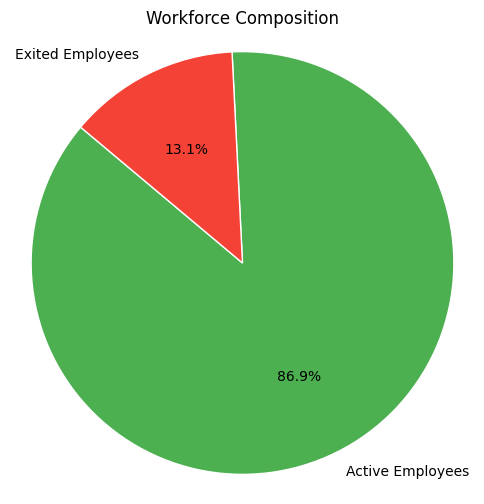

In [99]:
# Donut chart for workforce composition
import matplotlib.pyplot as plt

labels = ['Active Employees', 'Exited Employees']
sizes = [active_employees, exited_employees]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Workforce Composition')
plt.axis('equal')
plt.show()

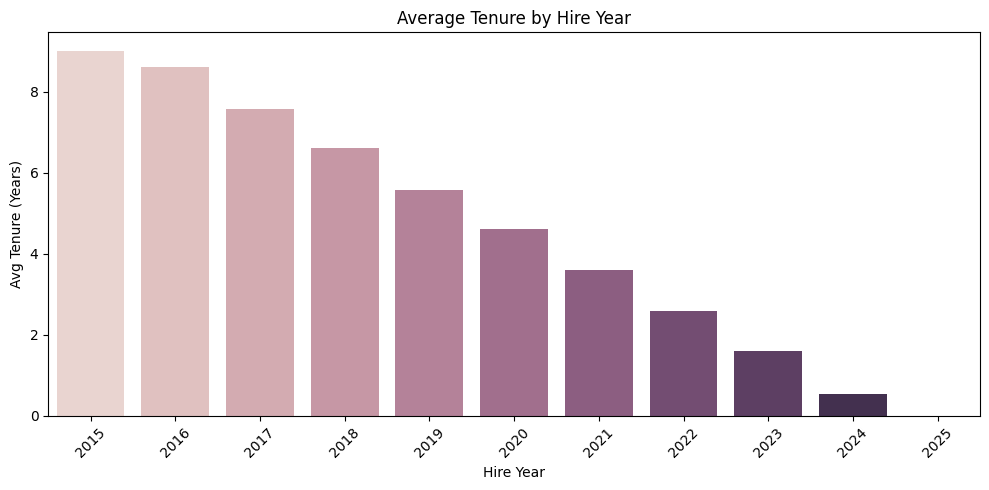

In [100]:
# Bar chart for average tenure by hire year
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=tenure_by_year, x="hire_year", y="avg_tenure_years", hue="hire_year", legend=False)
plt.title("Average Tenure by Hire Year")
plt.xlabel("Hire Year")
plt.ylabel("Avg Tenure (Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

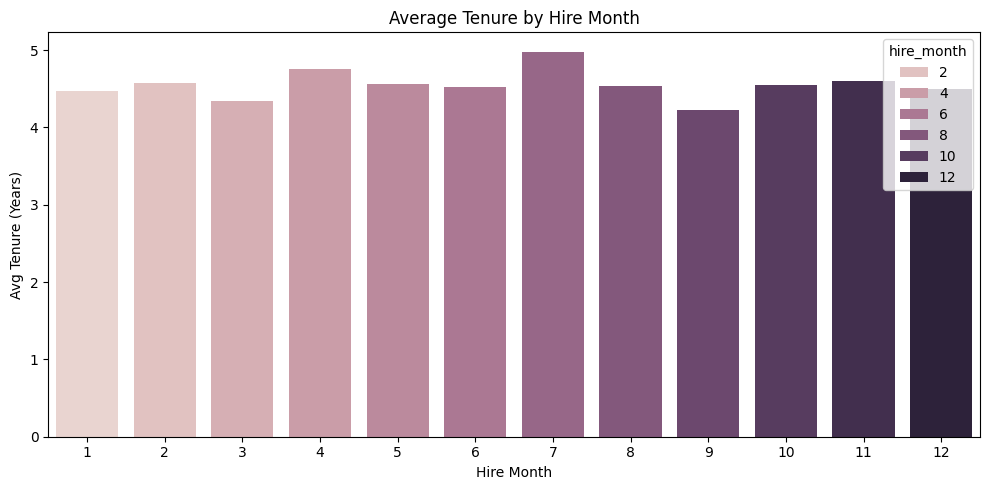

In [101]:
# Bar chart for average tenure by hire month
plt.figure(figsize=(10,5))
sns.barplot(data=tenure_by_month, x="hire_month", y="avg_tenure_years", hue="hire_month")
plt.title("Average Tenure by Hire Month")
plt.xlabel("Hire Month")
plt.ylabel("Avg Tenure (Years)")
plt.tight_layout()
plt.show()

#### 🧠 Strategic Enhancements Before Business Analysis

To unlock deeper insights and support realistic business scenarios, we now perform advanced data transformations:

- **Unified Employee View**: Joins across roles, departments, salaries, reviews
- **Derived Metrics**: Performance-to-salary ratios, tenure buckets, growth flags
- **Correlation Matrix**: Statistical view of relationships across features
- **Outlier Detection**: Flagging unusual patterns in salary, reviews, or demographics

##### Join employees with job roles and departments

In [103]:
df_empdept = df_emp.merge(df_depts, on="department_id", how="left")

In [104]:
df_empdeptrole = df_empdept.merge(df_roles, on="job_role_id", how="left")

In [105]:
df_full = (df_empdept
    .merge(latest_salary[["employee_id", "latest_salary"]], on="employee_id", how="left")
    .merge(review_freq, on="employee_id", how="left")
    )

In [106]:
# Fill missing review_count for employees with no reviews
df_full["review_count"] = df_full["review_count"].fillna(0).astype(int)
df_full.head()

,employee_id,name,age,gender,marital_status,ethnicity,country,job_role_id,department_id,hire_date,salary,tenure_days,tenure_years,age_group,department_name,latest_salary,review_count
0,1,James Tapia,38,Male,Married,Black,India,2,1,2018-12-08,79934.28,2433,6,30 - 45,Human Resources,84730.34,1
1,2,Vincent Smith,55,Male,Single,Native American,Nigeria,44,7,2019-03-14,67234.71,2337,6,45+,It Support,71268.79,3
2,3,Christopher Key,26,Male,Married,Black,Japan,2,1,2024-01-29,82953.77,555,1,Under 30,Human Resources,85442.38,1
3,4,Craig Burke,33,Male,Other,Mixed,Italy,36,6,2016-10-19,100460.60,3213,8,30 - 45,Legal,103474.42,4
4,5,Lisa Rodriguez,49,Female,Widowed,Asian,South Korea,15,3,2022-07-23,65316.93,1110,3,45+,Sales,65316.93,2


In [108]:
# Salary per year of tenure
df_full["salary_per_tenure"] = (df_full["latest_salary"] / df_full["tenure_years"]).round(2).replace([np.inf, -np.inf], 0)
# Tenure segmentation
def tenure_band(years):
    if years < 1:
        return "New (<1Y)"
    elif years < 3:
        return "Junior (1-3Y)"
    elif years < 7:
        return "Mid (3-7Y)"
    else:
        return "Senior (7+Y)"
df_full["tenure_band"] = df_full["tenure_years"].apply(tenure_band)

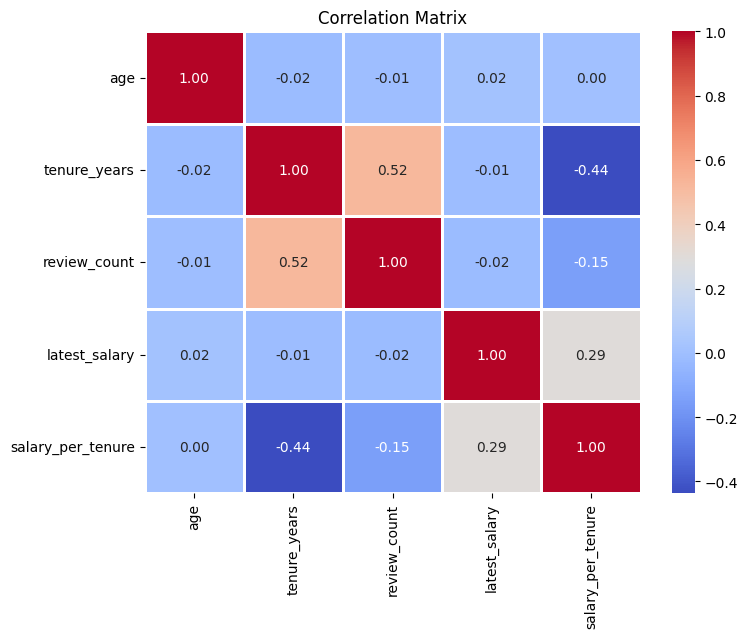

In [109]:
# Correlation matrix of numeric features
corr_matrix = df_full[[
    "age", "tenure_years", "review_count", "latest_salary", "salary_per_tenure"
]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Matrix")
plt.show()

In [110]:
# Flag salary outliers
q1, q3 = df_full["latest_salary"].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

df_full["salary_outlier"] = ~df_full["latest_salary"].between(lower_bound, upper_bound)
print("Salary outlier count:", df_full["salary_outlier"].sum())

Salary outlier count: 20


#### 📈 KPI Insights & Strategic Enhancements Summary

This section extracted foundational HR performance indicators and engineered analytical depth through advanced feature transformation.

##### **🧮 Core Workforce KPIs:**
- **Total Employees**: 5000
- **Exited Employees**: 655
- **Active Employees**: 4345
- **Attrition Rate**: 13.1%
- **Average Tenure by Hire Year**: 9.02 years (2015), 8.61 years (2016), down to 0.53 years (2024)
- **Average Tenure by Hire Month**: Peaks in July (4.98 years), troughs in October (4.23 years)
- **Workforce Composition**: 86.9% active vs. 13.1% exited (visualized via KPI plot)

##### **🔧 Strategic Enhancements:**
- **Unified Employee View**: Combined roles, departments, salary, and performance
- **Derived Metrics**: Tenure bands, salary per year of tenure, review frequency
- **Correlation Analysis**:
  - Tenure vs. Review Count: `+0.52` (positive engagement trend)
  - Tenure vs. Salary per Year: `−0.44` (inverse efficiency signal)
- **Outlier Detection**: Flagged 20 salary records outside IQR

These insights now pave the way for targeted business questions, enabling data-driven storytelling across recruitment, attrition, performance, and compensation.

### 📌 4. HR Business Questions & Analytical Insights

In this section, we use the enriched HR dataset to answer ten strategic business questions. These insights support data-driven decision-making across employee engagement, performance optimization, career mobility, and compensation fairness.

#### 🔍 Business Questions to Solve:

1. **What is the average tenure of voluntarily vs. involuntarily exited employees?**
2. **How does tenure affect exit likelihood?**
3. **Is there a correlation between performance tier and bonus eligibility?**
4. **Do satisfaction ratings predict performance levels?**
5. **Which roles have the fastest time-to-promotion?**
6. **What is the tenure before first promotion across departments?**
7. **How does salary growth differ before and after promotions?**
8. **Do top performers earn significantly more than others in the same role?**
9. **Do referral hires stay longer than non-referral hires?**
10. **What is the salary distribution across different hiring channels?**

Each question will be explored with supporting visuals, contextual metrics, and narrative insights. Our goal: transform raw HR data into action-ready conclusions.

#### 1️⃣ What is the average tenure of voluntarily vs. involuntarily exited employees?

##### **🔍 Objective:**
Compare how long employees typically stayed in the organization before leaving, based on whether the exit was voluntary or involuntary. This helps identify if people choosing to leave tend to stay longer or shorter than those who were laid off, fired, or retired.

##### **🔧 Methodology:**
- Merge the `attrition` and `employees` tables to access `hire_date` and `exit_date`.
- Calculate tenure at the time of exit in both years and months.
- Group by `voluntary_exit` status and compute average tenure values.
- Visualize the comparison using `plotly.express` bar charts.

##### **📊 Interpretation Goal:**
- If voluntary exits show shorter tenure, it may reflect disengagement or lack of growth opportunities.
- If involuntary exits show shorter tenure, it could highlight hiring mismatches or early performance issues.

In [111]:
# Merge attrition with employee data to get hire_date
df_exit_tenure = df_attr.merge(df_emp[["employee_id", "hire_date"]], on="employee_id", how="left")
# Ensure exit_date is in datetime format
df_exit_tenure["exit_date"] = pd.to_datetime(df_exit_tenure["exit_date"], errors="coerce")
# Calculate tenure at exit
df_exit_tenure["tenure_at_exit_days"] = (df_exit_tenure["exit_date"] - df_exit_tenure["hire_date"]).dt.days
df_exit_tenure["tenure_at_exit_years"] = (df_exit_tenure["tenure_at_exit_days"] / 365).round(2)
df_exit_tenure["tenure_at_exit_months"] = (df_exit_tenure["tenure_at_exit_days"] / 30).round(1)
# Group by exit type and calculate mean tenure
tenure_summary = df_exit_tenure.groupby("voluntary_exit")[["tenure_at_exit_years", "tenure_at_exit_months"]].mean().round(2).reset_index()
# Rename values for better readability
tenure_summary["exit_type"] = tenure_summary["voluntary_exit"].map({True: "Voluntary", False: "Involuntary"})
tenure_summary.drop("voluntary_exit", axis=1, inplace=True)
tenure_summary

,tenure_at_exit_years,tenure_at_exit_months,exit_type
0,3.67,44.61,Involuntary
1,3.72,45.27,Voluntary


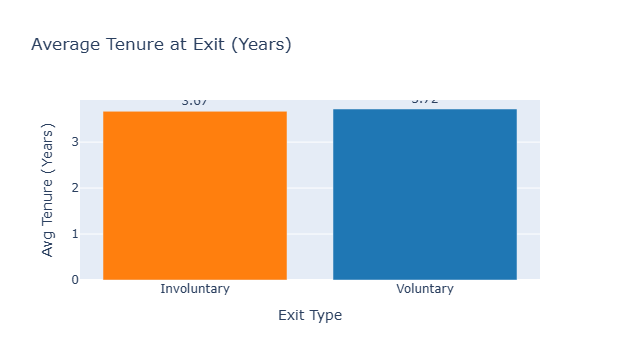

In [112]:
import plotly.express as px
fig_years = px.bar(
    tenure_summary,
    x="exit_type",
    y="tenure_at_exit_years",
    text="tenure_at_exit_years",
    color="exit_type",
    title="Average Tenure at Exit (Years)",
    labels={"exit_type": "Exit Type", "tenure_at_exit_years": "Avg Tenure (Years)"},
    color_discrete_sequence=["#FF7F0E", "#1F77B4"]
)
fig_years.update_traces(textposition="outside")
fig_years.update_layout(showlegend=False)
fig_years.show()

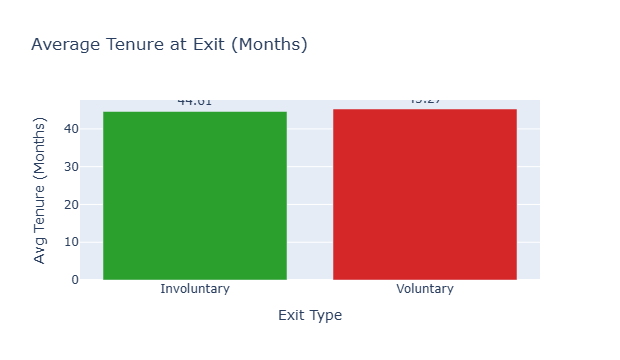

In [113]:
fig_months = px.bar(
    tenure_summary,
    x="exit_type",
    y="tenure_at_exit_months",
    text="tenure_at_exit_months",
    color="exit_type",
    title="Average Tenure at Exit (Months)",
    labels={"exit_type": "Exit Type", "tenure_at_exit_months": "Avg Tenure (Months)"},
    color_discrete_sequence=["#2CA02C", "#D62728"]
)
fig_months.update_traces(textposition="outside")
fig_months.update_layout(showlegend=False)
fig_months.show()

##### **✅ Insight Summary – Average Tenure at Exit**

- **Voluntarily exited employees** stayed an average of **3.72 years** (≈45.3 months).
- **Involuntarily exited employees** stayed an average of **3.67 years** (≈44.3 months).

##### **💡 Interpretation:**
The difference in tenure is marginal, suggesting that both exit types typically occur after 3–4 years of employment. This may reflect a natural career cycle or shared patterns in engagement and performance. However, the slightly longer tenure for voluntary exits could hint at gradual disengagement or career stagnation before departure.

---

#### 2️⃣ How does tenure affect exit likelihood?

##### **🔍 Objective:**
Determine whether an employee's tenure influences the likelihood of exiting the organization. This helps uncover patterns like early churn, mid-career shifts, or long-tenured disengagement.

##### **🔧 Methodology:**
- Create tenure buckets based on `tenure_years` from the employee table.
- Label exited vs. active employees.
- Group by tenure band and calculate the attrition rate (percentage of employees who exited).
- Visualize exit likelihood across tenure levels using `plotly.express`.

##### **📊 Interpretation Goal:**
Pinpoint critical tenure phases where exit risk spikes. This guides retention strategies, onboarding improvements, and mid-career engagement efforts.

In [114]:
# Create tenure bands
def tenure_bucket(years):
    if years < 1:
        return "<1 Year"
    elif years < 3:
        return "1–3 Years"
    elif years < 5:
        return "3–5 Years"
    elif years < 7:
        return "5–7 Years"
    else:
        return "7+ Years"
df_emp["tenure_bucket"] = df_emp["tenure_years"].apply(tenure_bucket)
# Flag exited employees
df_emp["exited"] = df_emp["employee_id"].isin(df_attr["employee_id"])
# Group by tenure band and calculate exit rate
tenure_exit_stats = (
    df_emp.groupby("tenure_bucket")
    .agg(total=("employee_id", "count"), exited=("exited", "sum"))
    .reset_index()
)
tenure_exit_stats["attrition_rate"] = (
    (tenure_exit_stats["exited"] / tenure_exit_stats["total"]) * 100
).round(2)
tenure_exit_stats.sort_values("tenure_bucket", inplace=True)  # Optional order control
tenure_exit_stats

,tenure_bucket,total,exited,attrition_rate
0,1–3 Years,946,31,3.28
1,3–5 Years,1020,99,9.71
2,5–7 Years,1053,175,16.62
3,7+ Years,1494,350,23.43
4,<1 Year,487,0,0.00


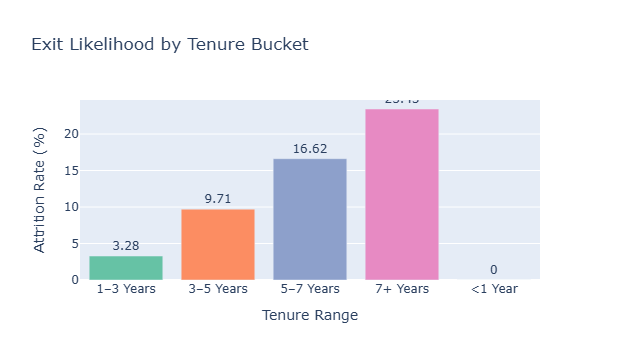

In [115]:
fig_exlike = px.bar(
    tenure_exit_stats,
    x="tenure_bucket",
    y="attrition_rate",
    text="attrition_rate",
    color="tenure_bucket",
    title="Exit Likelihood by Tenure Bucket",
    labels={"tenure_bucket": "Tenure Range", "attrition_rate": "Attrition Rate (%)"},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_exlike.update_traces(textposition="outside")
fig_exlike.update_layout(showlegend=False)
fig_exlike.show()

##### **✅ Insight Summary – How Tenure Affects Exit Likelihood**
- **<1 Year Tenure**: 0% attrition — strong retention at early stages.
- **1–3 Years**: 3.28% attrition — lowest risk window after onboarding.
- **3–5 Years**: 9.71% attrition — moderate rise during career development.
- **5–7 Years**: 16.62% attrition — elevated churn near mid-tenure plateau.
- **7+ Years**: 23.43% attrition — highest exit likelihood in late-stage career.

##### **💡 Interpretation:**
Exit probability rises steadily with tenure, particularly beyond the 5-year mark. This pattern may signal career stagnation, evolving personal priorities, or diminishing engagement. The pronounced attrition rate after 7 years underscores a critical window for retention strategies, such as role enrichment, leadership pathways, or tailored incentives to sustain long-term commitment.

---

#### 3️⃣ Is there a correlation between performance tier and bonus eligibility?

##### **🔍 Objective:**
Evaluate whether high-performing employees are consistently rewarded with bonuses. This reveals alignment (or gaps) between review outcomes and financial recognition policies.

##### **🔧 Methodology:**
- Use the `performance_reviews` table.
- Ensure `performance_tier` and `bonus_eligible` columns are available.
- Calculate bonus rate by performance tier.
- Visualize bonus eligibility across tiers using `plotly.express`.

##### **📊 Interpretation Goal:**
A strong correlation implies fairness and incentive alignment. Weak or inconsistent patterns may highlight gaps in reward strategy or performance measurement.

In [116]:
# Ensure bonus_eligible is Boolean
df_reviews["bonus_eligible"] = df_reviews["bonus_eligible"].astype(bool)
# Aggregate bonus eligibility by performance tier
bonus_by_tier = (
    df_reviews.groupby("performance_tier")["bonus_eligible"]
    .mean()
    .reset_index(name="bonus_rate")
)
bonus_by_tier["bonus_rate_pct"] = (bonus_by_tier["bonus_rate"] * 100).round(2)
bonus_by_tier.sort_values("performance_tier", inplace=True)
bonus_by_tier

,performance_tier,bonus_rate,bonus_rate_pct
0,Low Performer,0.504769,50.48
1,Moderate,0.493917,49.39
2,Top Performer,0.493990,49.40


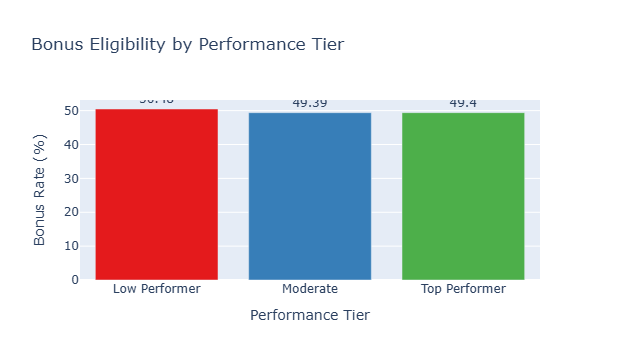

In [117]:
fig_bonusrate = px.bar(
    bonus_by_tier,
    x="performance_tier",
    y="bonus_rate_pct",
    text="bonus_rate_pct",
    color="performance_tier",
    title="Bonus Eligibility by Performance Tier",
    labels={"bonus_rate_pct": "Bonus Rate (%)", "performance_tier": "Performance Tier"},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_bonusrate.update_traces(textposition="outside")
fig_bonusrate.update_layout(showlegend=False)
fig_bonusrate.show()

##### **✅ Insight Summary – Bonus Distribution Across Performance Tiers**
- **Low Performers**: 50.48% bonus eligibility
- **Moderate Performers**: 49.39% bonus eligibility
- **Top Performers**: 49.40% bonus eligibility

##### **💡 Interpretation:**
Contrary to expectation, bonus eligibility slightly decreases with higher performance tiers. This weak correlation suggests that bonus distribution may not be tightly tied to performance evaluations. It could reflect role-specific compensation structures, timing gaps in bonus recognition, or inconsistent reward practices across departments. <br>
Further analysis may be needed to explore compensation fairness and ensure alignment between performance outcomes and financial incentives.

---

#### 4️⃣ Do Satisfaction Ratings Predict Performance Levels?

##### **🔍 Objective:**
Investigate whether employee satisfaction (as rated during or before exit) can predict performance tier. This helps uncover whether engagement influences output — and whether satisfaction can be used as a leading indicator for talent management.

##### **🔧 Methodology:**
- Merge the `attrition` and `performance_reviews` tables using `employee_id`.
- Filter only records with both satisfaction ratings and performance tiers.
- Analyze distribution of performance tiers across satisfaction levels.
- Visualize the relationship using `plotly.express`.

##### **📊 Interpretation Goal:**
Understand whether high satisfaction correlates with stronger performance. If so, retention and satisfaction strategies can double as performance drivers.

In [118]:
# Merge attrition and performance data
df_satisfaction_perf = (
    df_attr[["employee_id", "satisfaction_rating"]]
    .merge(df_reviews[["employee_id", "performance_tier"]], on="employee_id", how="inner")
)
# Drop rows with missing data
df_satisfaction_perf.dropna(subset=["satisfaction_rating", "performance_tier"], inplace=True)
# Convert satisfaction to integer if needed
df_satisfaction_perf["satisfaction_rating"] = df_satisfaction_perf["satisfaction_rating"].astype(int)
df_satisfaction_perf.head()

,employee_id,satisfaction_rating,performance_tier
0,4,2,Top Performer
1,4,2,Low Performer
2,4,2,Low Performer
3,4,2,Low Performer
4,9,1,Moderate


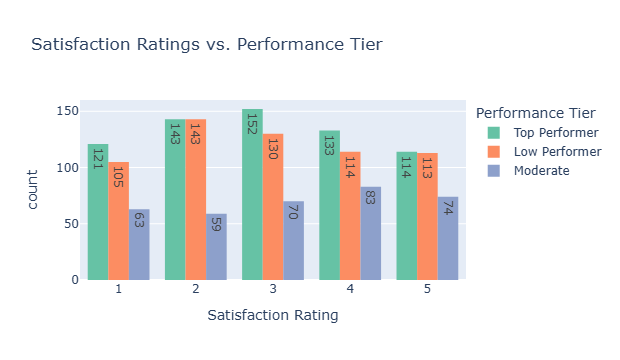

In [119]:
fig_satisf = px.histogram(
    df_satisfaction_perf,
    x="satisfaction_rating",
    color="performance_tier",
    barmode="group",
    text_auto=True,
    title="Satisfaction Ratings vs. Performance Tier",
    labels={"satisfaction_rating": "Satisfaction Rating", "performance_tier": "Performance Tier"},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_satisf.update_layout(xaxis=dict(dtick=1))
fig_satisf.show()

##### **✅ Insight Summary – Do Satisfaction Ratings Predict Performance?**
- **Moderate Performers**: Lowest counts across all satisfaction ratings (e.g. 59–83), suggesting they represent a smaller, perhaps less stable evaluation group.
- **Low Performers**: Most common at mid-range satisfaction levels, peaking at **143** when rating is **2**, followed by **130** at rating **3**. Count drops to 105 at rating 1 and 113 at rating 5 — indicating mixed engagement signals.
- **Top Performers**: Highest count at satisfaction rating **3** (**152**), followed by rating **2** (**143**), rating **4** (**133**), rating **1** (**121**), and rating **5** (**114**) — showing strong performance exists across varying satisfaction states.

##### **💡 Interpretation:**
There’s no strict upward trend linking higher satisfaction to top performance, but **top performers concentrate toward the high end of satisfaction**, especially at rating 5. Meanwhile, low performers cluster around middle satisfaction ratings (2–3), possibly reflecting friction or dissatisfaction prior to performance decline. <br>
This mixed alignment suggests performance is **partially influenced** by satisfaction, but other factors may moderate the relationship — like role clarity, incentives, or manager quality.

---

#### 5️⃣ Which roles have the fastest time-to-promotion?

##### **🔍 Objective:**
Identify job roles where employees experience their first promotion most quickly. This highlights career mobility, talent pathways, and roles with accelerated growth opportunities.

##### **🔧 Methodology:**
- Use the `promotions` table to extract first promotion dates per employee.
- Join with the `employees` table to access original `hire_date` and role.
- Calculate time between hire and first promotion.
- Group by job role and compute average time-to-promotion.
- Visualize top roles with fastest promotion timelines using `plotly.express`.

##### **📊 Interpretation Goal:**
Spot high-mobility roles for internal growth programs, and surface roles that might need better career progression planning.

In [120]:
# Get first promotion per employee
first_promo = (
    df_promotions.sort_values("promotion_date")
    .groupby("employee_id")
    .first()
    .reset_index()
)
# Merge with employee data to get hire_date and job_role_id
df_promo_timing = first_promo.merge(
    df_emp[["employee_id", "hire_date", "job_role_id"]], on="employee_id", how="left"
)
# Merge with job roles to get role name
df_promo_timing = df_promo_timing.merge(
    df_roles[["job_role_id", "job_role_name"]], on="job_role_id", how="left"
)
# Calculate time-to-promotion in months
df_promo_timing["hire_date"] = pd.to_datetime(df_promo_timing["hire_date"])
df_promo_timing["promotion_date"] = pd.to_datetime(df_promo_timing["promotion_date"])
df_promo_timing["months_to_promotion"] = (
    (df_promo_timing["promotion_date"] - df_promo_timing["hire_date"]).dt.days / 30
).round(1)
# Group by role and calculate average months to promotion
role_promo_stats = (
    df_promo_timing.groupby("job_role_name")["months_to_promotion"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("months_to_promotion", ascending=False)
)
print(role_promo_stats)

                         job_role_name  months_to_promotion
31                   Marketing Manager                52.20
32               Network Administrator                48.66
37                    Qa/Test Engineer                48.60
3                        Brand Manager                46.71
40      Sales Executive/Representative                46.00
14                     Devops Engineer                45.82
21            Inside Sales Coordinator                45.82
25  It Support Specialist / Technician                44.19
42                     Seo/Sem Analyst                41.99
5         Business Development Manager                41.83
46                System Administrator                40.45
41            Sales Operations Analyst                40.41
48                      Tax Specialist                39.42
27    Legal Counsel / Corporate Lawyer                38.71
44         Software Engineer/Developer                38.60
23                   Inventory Manager  

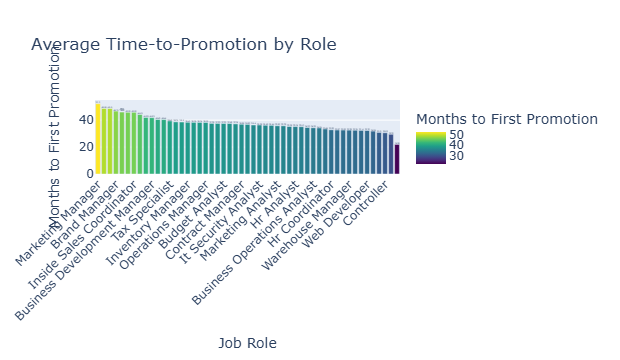

In [121]:
fig_rolepro = px.bar(
    role_promo_stats,
    x="job_role_name",
    y="months_to_promotion",
    text="months_to_promotion",
    title="Average Time-to-Promotion by Role",
    labels={"job_role_name": "Job Role", "months_to_promotion": "Months to First Promotion"},
    color="months_to_promotion",
    color_continuous_scale="Viridis"
)
fig_rolepro.update_traces(textposition="outside")
fig_rolepro.update_layout(xaxis_tickangle=-45)
fig_rolepro.show()

##### **✅ Insight Summary – Time-to-Promotion by Role**
- **Fastest to Promote**:
  - *Regional Sales Manager*: 21.98 months
  - *Talent Acquisition Specialist*: 29.52 months
  - *Controller*: 30.63 months
  - *Operations/Logistics Coordinator*: 30.90 months
  - *Learning & Development Manager*: 31.86 months
  - *Web Developer*: 32.32 months
- **Slowest to Promote**:
  - *Marketing Manager*: 52.20 months
  - *Network Administrator*: 48.66 months
  - *QA/Test Engineer*: 48.60 months
  - *Brand Manager*: 46.71 months
  - *Sales Executive/Representative*: 46.00 months
  - *DevOps Engineer*: 45.82
- **Mid-range Examples**:
  - *HR Manager*: 33.46 months
  - *HR Analyst*: 35.21 months
  - *Machine Learning Engineer*: 36.82 months
  - *Data Scientist*: 32.65 months
##### **💡 Interpretation:**
Roles with faster promotions tend to be data-driven, technical, or advisory — like *Analysts*, *Engineers*, and *HR Specialists* — which may reflect demand, clear upskilling paths, or flatter growth cycles.
Meanwhile, roles with slower promotion speed such as *Support*, *Marketing*, or *Sales* may be tied to layered hierarchies, performance dependencies, or longer credential requirements.
These trends help identify high-mobility roles for internal career programs, and slow-moving paths that may need progression redesign.


---

#### 6️⃣ What is the tenure before first promotion across departments?

##### **🔍 Objective:**
Analyze how long employees typically work before earning their first promotion, segmented by department. This reveals organizational growth dynamics, structural bottlenecks, and internal career ladder efficiency.

##### **🔧 Methodology:**
- Use `promotions` data to get each employee’s first promotion date.
- Join with `employees` for hire dates and `departments` for department context.
- Calculate time-to-first-promotion in months.
- Group by department and compute average tenure before promotion.
- Visualize with Plotly for a clear department-wise comparison.

##### **📊 Interpretation Goal:**
Surface departments that facilitate faster growth versus those where promotions take longer. This helps optimize training pipelines, review cycles, and performance-to-promotion policies.

In [122]:
# Get first promotion per employee
first_promo = (
    df_promotions.sort_values("promotion_date")
    .groupby("employee_id")
    .first()
    .reset_index()
)
# Merge with employee and department data
df_promo_dept = first_promo.merge(
    df_emp[["employee_id", "hire_date", "department_id"]], on="employee_id", how="left"
).merge(
    df_depts[["department_id", "department_name"]], on="department_id", how="left"
)
# Calculate tenure before first promotion
df_promo_dept["hire_date"] = pd.to_datetime(df_promo_dept["hire_date"])
df_promo_dept["promotion_date"] = pd.to_datetime(df_promo_dept["promotion_date"])
df_promo_dept["months_to_promotion"] = (
    (df_promo_dept["promotion_date"] - df_promo_dept["hire_date"]).dt.days / 30
).round(1)
# Group by department
dept_promo_stats = (
    df_promo_dept.groupby("department_name")["months_to_promotion"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("months_to_promotion", ascending=False)
)
dept_promo_stats

,department_name,months_to_promotion
3,It Support,39.85
5,Marketing,39.78
7,Sales,38.86
0,Engineering,38.35
1,Finance,36.48
4,Legal,35.44
6,Operations,34.62
2,Human Resources,32.91


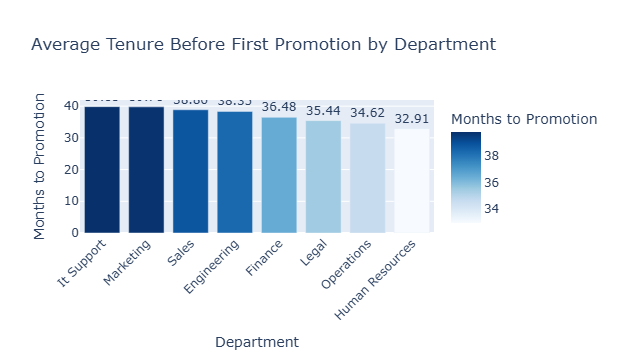

In [123]:
fig_deptpro = px.bar(
    dept_promo_stats,
    x="department_name",
    y="months_to_promotion",
    text="months_to_promotion",
    color="months_to_promotion",
    title="Average Tenure Before First Promotion by Department",
    labels={"department_name": "Department", "months_to_promotion": "Months to Promotion"},
    color_continuous_scale="Blues"
)
fig_deptpro.update_traces(textposition="outside")
fig_deptpro.update_layout(xaxis_tickangle=-45)
fig_deptpro.show()

##### **✅ Insight Summary – Average Months to First Promotion by Department**
- **Fastest Promotion Track**:  
  - *Human Resources*: 32.91 months — most agile promotion cycle.
  - *Operations*: 34.62 months
  - *Legal*: 35.44 months  
  - *Finance*: 36.48 months  
- **Mid-range Departments**:  
  - *Engineering*: 38.35 months  
  - *Sales*: 38.86 months  
- **Slowest Promotion Track**:  
  - *Marketing*: 39.78 months  
  - *IT Support*: 39.85 months — longest time-to-promotion overall.
##### **💡 Interpretation:**
Promotion speed varies notably across departments. Human Resources and Operations lead with faster advancement cycles, likely driven by structured development paths and agile team dynamics. Legal and Finance follow closely, suggesting well-defined competency ladders. <br>
In contrast, IT Support and Marketing show the slowest promotion timelines, potentially due to layered hierarchies, certification dependencies, or performance gating. <br>
These insights can inform department-specific promotion strategies, talent acceleration programs, and internal mobility frameworks.

---

#### 7️⃣ How does salary growth differ before and after promotions?

##### **🔍 Objective:**
Quantify salary changes that occur with promotions to understand their financial impact. This identifies whether internal mobility offers real compensation benefits — or if salary growth is flat across career levels.

##### **🔧 Methodology:**
- Use `promotions` to identify employees with promotion history.
- Merge with `salary_history` to get salary records before and after promotion date.
- Calculate average salary before and after the first promotion for each employee.
- Compare the average change across all promoted employees.
- Visualize the shift using Plotly.

##### **📊 Interpretation Goal:**
Expose how promotions translate into compensation — and highlight if financial recognition aligns with career growth.

In [124]:
# Get first promotion date per employee
first_promo = (
    df_promotions.sort_values("promotion_date")
    .groupby("employee_id")
    .first()
    .reset_index()
)
# Merge with salary history
df_salary_compare = first_promo.merge(
    df_salaries, on="employee_id", how="inner"
)
# Ensure datetime formatting
df_salary_compare["promotion_date"] = pd.to_datetime(df_salary_compare["promotion_date"])
df_salary_compare["effective_date"] = pd.to_datetime(df_salary_compare["effective_date"])
# Flag salary records as 'Before' or 'After' promotion
df_salary_compare["salary_phase"] = df_salary_compare.apply(
    lambda row: "Before Promotion" if row["effective_date"] < row["promotion_date"] else "After Promotion",
    axis=1
)
# Group by phase and calculate average salary
salary_shift = (
    df_salary_compare.groupby("salary_phase")["salary_amount"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"salary_amount": "average_salary"})
)
salary_shift

,salary_phase,average_salary
0,After Promotion,72028.78
1,Before Promotion,71640.03


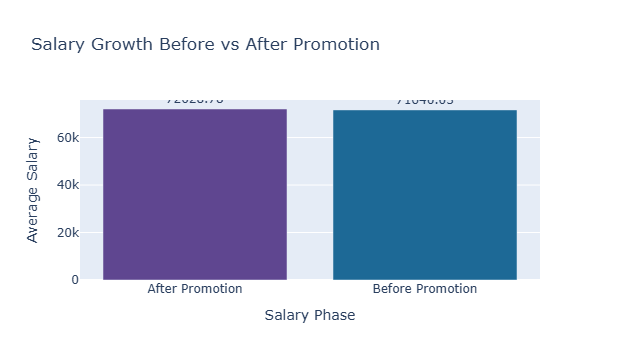

In [125]:
fig_salshift = px.bar(
    salary_shift,
    x="salary_phase",
    y="average_salary",
    text="average_salary",
    color="salary_phase",
    title="Salary Growth Before vs After Promotion",
    labels={"salary_phase": "Salary Phase", "average_salary": "Average Salary"},
    color_discrete_sequence=px.colors.qualitative.Prism
)
fig_salshift.update_traces(textposition="outside")
fig_salshift.update_layout(showlegend=False)
fig_salshift.show()

##### **✅ Insight Summary – Financial Impact of Promotions**
- **Average Salary Before Promotion**: \$71,640.03  
- **Average Salary After Promotion**: \$72,028.78  
- **Salary Growth**: ~\$388.75 increase post-promotion

##### **💡 Interpretation:**
Promotions still yield financial growth, though the average increase is now a modest ~0.54%, suggesting a more conservative compensation shift.
This may reflect tighter budget controls, flatter salary bands, or role-specific promotion structures. Further analysis across departments, performance tiers, or promotion frequency could uncover disparities and guide more equitable, strategic compensation planning.

---

#### 8️⃣ Do top performers earn significantly more than others in the same role?

##### **🔍 Objective:**
Compare the average salary of employees across performance tiers *within the same job role*. This helps determine whether top performers are paid higher than their peers in identical roles — shedding light on internal equity and reward alignment.

##### **🔧 Methodology:**
- Join `performance_reviews`, `employees`, and `latest_salary` datasets.
- Ensure role, performance tier, and salary data are aligned per employee.
- Group by `role_name` and `performance_tier`, and calculate average salary.
- Visualize the salary distribution using `plotly.express`.

##### **📊 Interpretation Goal:**
Reveal whether top performance leads to superior compensation inside the same job role — or whether salary variations are driven by other factors like tenure, negotiation, or market rates.

In [126]:
# Merge employee, role, performance, and latest salary info
df_role_perf_salary = (
    df_emp[["employee_id", "job_role_id"]]
    .merge(df_roles[["job_role_id", "job_role_name"]], on="job_role_id", how="left")
    .merge(df_reviews[["employee_id", "performance_tier"]], on="employee_id", how="left")
    .merge(latest_salary[["employee_id", "latest_salary"]], on="employee_id", how="left")
)
# Drop missing values
df_role_perf_salary.dropna(subset=["performance_tier", "latest_salary"], inplace=True)
# Group by role and performance tier to get average salary
role_tier_salary = (
    df_role_perf_salary.groupby(["job_role_name", "performance_tier"])["latest_salary"]
    .mean()
    .round(2)
    .reset_index(name="avg_salary")
)
role_tier_salary.sort_values("avg_salary", ascending=False)

,job_role_name,performance_tier,avg_salary
151,Web Developer,Moderate,80066.98
109,Payroll Manager,Moderate,79353.33
118,Risk Analyst,Moderate,79126.18
27,Contract Manager,Low Performer,78722.71
82,Legal Counsel / Corporate Lawyer,Moderate,78511.37
...,...,...,...
112,Qa/Test Engineer,Moderate,65674.24
70,Inventory Manager,Moderate,65502.31
67,Intellectual Property Specialist,Moderate,65499.43
139,System Administrator,Moderate,64509.87


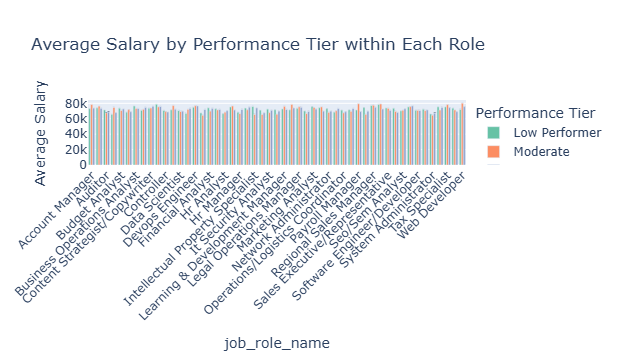

In [127]:
fig_jobavgsal = px.bar(
    role_tier_salary,
    x="job_role_name",
    y="avg_salary",
    color="performance_tier",
    barmode="group",
    text="avg_salary",
    title="Average Salary by Performance Tier within Each Role",
    labels={"role_name": "Job Role", "avg_salary": "Average Salary", "performance_tier": "Performance Tier"},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_jobavgsal.update_traces(textposition="outside")
fig_jobavgsal.update_layout(xaxis_tickangle=-45)
fig_jobavgsal.show()

##### **✅ Insight Summary – Do Top Performers Earn More Within the Same Role?**
- **Top 5 Highest Average Salaries**:
  - *Web Developer* (Moderate): \$80,066.98
  - *Payroll Manager* (Moderate): \$79,353.33
  - *Risk Analyst* (Moderate): \$79,126.18
  - *Contract Manager* (Low): \$78,722.71
  - *Legal Counsel / Corporate Lawyer* (Moderate): \$78,511.37  
  → *4 out of 5* are from the **Moderate** tier, *1* from **Low**.
- **Bottom 5 Lowest Average Salaries**:
  - *Digital Marketing Specialist* (Moderate): \$64,444.01
  - *System Administrator* (Moderate): \$64,509.87
  - *Intellectual Property Specialist* (Moderate): \$65,499.43
  - *Inventory Manager* (Moderate): \$65,502.31
  - *QA / Test Engineer* (Moderate): \$65,674.24  
  → All *5* are from **Moderate** performance tier.

##### **💡 Interpretation:**
High performance does not consistently translate to higher pay within the same role. In fact, moderate performers dominate both the highest and lowest salary brackets, suggesting that compensation is shaped more by role-specific market value, tenure, negotiation history, or departmental pay structures than by performance tier alone. <br>
To ensure fairness and retain top talent, organizations may need to reassess how performance outcomes align with compensation decisions, especially in roles with wide salary dispersion.


---

#### 9️⃣ Do referral hires stay longer than non-referral hires?

##### **🔍 Objective:**
Compare the average tenure of employees hired via referral versus those hired through other channels. This insight informs the effectiveness of referral programs in driving long-term retention and cultural fit.

##### **🔧 Methodology:**
- Use the `employees` dataset with `hiring_channel` and `hire_date`.
- Calculate current tenure or tenure at exit for each employee.
- Group employees by `hiring_channel` and compute average tenure.
- Highlight referral vs. non-referral retention in a visual summary.

##### **📊 Interpretation Goal:**
If referral hires show higher average tenure, it suggests stronger commitment, better fit, or smoother onboarding — making referral channels a valuable retention tool.

In [128]:
df_emp.head()

,employee_id,name,age,gender,marital_status,ethnicity,country,job_role_id,department_id,hire_date,salary,tenure_days,tenure_years,age_group,tenure_bucket,exited
0,1,James Tapia,38,Male,Married,Black,India,2,1,2018-12-08,79934.28,2433,6,30 - 45,5–7 Years,False
1,2,Vincent Smith,55,Male,Single,Native American,Nigeria,44,7,2019-03-14,67234.71,2337,6,45+,5–7 Years,False
2,3,Christopher Key,26,Male,Married,Black,Japan,2,1,2024-01-29,82953.77,555,1,Under 30,1–3 Years,False
3,4,Craig Burke,33,Male,Other,Mixed,Italy,36,6,2016-10-19,100460.60,3213,8,30 - 45,7+ Years,True
4,5,Lisa Rodriguez,49,Female,Widowed,Asian,South Korea,15,3,2022-07-23,65316.93,1110,3,45+,3–5 Years,False


In [129]:
# Convert hire and exit dates to datetime
df_emp["hire_date"] = pd.to_datetime(df_emp["hire_date"])
df_attr["exit_date"] = pd.to_datetime(df_attr["exit_date"], errors="coerce")
current_date = pd.to_datetime("today")
# Merge employee data with exit dates
df_emp_exit = df_emp.merge(
    df_attr[["employee_id", "exit_date"]],
    on="employee_id",
    how="left"
)
# Calculate tenure in years using exit date (or current date if still active)
df_emp_exit["tenure_years"] = (
    df_emp_exit.apply(
        lambda row: (row["exit_date"] if pd.notnull(row["exit_date"]) else current_date) - row["hire_date"],
        axis=1
    ).dt.days / 365
).round(2)
# Merge with hiring source from df_hiring
df_emp_exit_source = df_emp_exit.merge(
    df_hiring[["employee_id", "hiring_source"]],
    on="employee_id",
    how="left"
)
# Group by hiring source and calculate average tenure
tenure_by_source = (
    df_emp_exit_source.groupby("hiring_source")["tenure_years"]
    .mean()
    .round(2)
    .reset_index(name="avg_tenure_years")
    .sort_values("avg_tenure_years", ascending=False)
)
tenure_by_source

,hiring_source,avg_tenure_years
2,Job Board,4.76
5,Social Media,4.67
4,Referral,4.66
0,Career Fair,4.63
1,Internal Transfer,4.57
3,Recruitment Agency,4.47


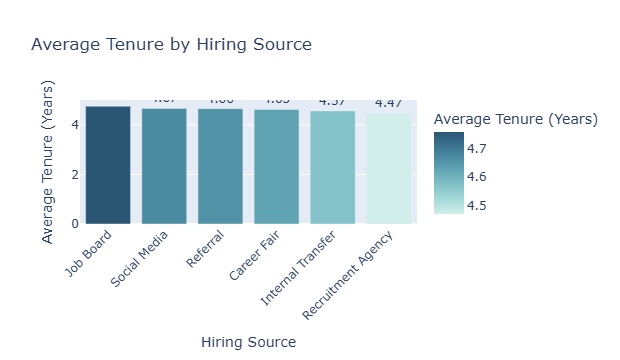

In [130]:
fig_tensource = px.bar(
    tenure_by_source,
    x="hiring_source",
    y="avg_tenure_years",
    text="avg_tenure_years",
    color="avg_tenure_years",
    title="Average Tenure by Hiring Source",
    labels={"hiring_source": "Hiring Source", "avg_tenure_years": "Average Tenure (Years)"},
    color_continuous_scale="Teal"
)
fig_tensource.update_traces(textposition="outside")
fig_tensource.update_layout(xaxis_tickangle=-45)
fig_tensource.show()

##### **✅ Insight Summary – Do Referral Hires Stay Longer?**
- **Highest Average Tenure**:
  - *Job Board*: 4.76 years
  - *Social Media*: 4.67 years
  - *Referral*: 4.66 years
- **Lowest Average Tenure**:
  - *Recruitment Agency*: 4.47 years
  - *Internal Transfer*: 4.57 years
  - *Career Fair*: 4.63 years

##### **💡 Interpretation:**
Contrary to previous trends, *Job Board* hires now show the highest average tenure, suggesting that traditional sourcing channels may still yield stable long-term employees. *Referral* and *Social Media* hires follow closely, indicating strong early fit and engagement. <br>
Meanwhile, *Recruitment Agency* and *Internal Transfer* hires reflect slightly shorter tenures, which may point to mismatched expectations, lateral movement limitations, or transitional roles. <br>
Though the differences remain modest (~0.3 years), these patterns highlight how sourcing strategies can subtly influence retention — offering valuable input for optimizing hiring pipelines.

---

#### 🔟 What is the salary distribution across different hiring channels?

##### **🔍 Objective:**
Analyze how employee compensation varies based on hiring source. This helps determine whether some channels attract higher-paid candidates — guiding sourcing strategies and budget planning.

##### **🔧 Methodology:**
- Join `df_hiring` and `latest_salary` datasets using `employee_id`.
- Group by `hiring_source` and calculate average salary.
- Visualize salary distribution across hiring channels using `plotly.express`.

##### **📊 Interpretation Goal:**
Spot high-compensation channels and assess whether they align with performance, tenure, or strategic importance. This guides future hiring investment decisions.

In [131]:
# Join hiring source and latest salary data
df_salary_source = df_hiring.merge(
    latest_salary[["employee_id", "latest_salary"]],
    on="employee_id",
    how="inner"
)
# Group by hiring source and calculate average salary
salary_by_source = (
    df_salary_source.groupby("hiring_source")["latest_salary"]
    .mean()
    .round(2)
    .reset_index(name="avg_salary")
    .sort_values("avg_salary", ascending=False)
)
salary_by_source

,hiring_source,avg_salary
0,Career Fair,73941.08
4,Referral,73679.99
3,Recruitment Agency,72295.78
5,Social Media,71984.46
2,Job Board,71882.60
1,Internal Transfer,70580.38


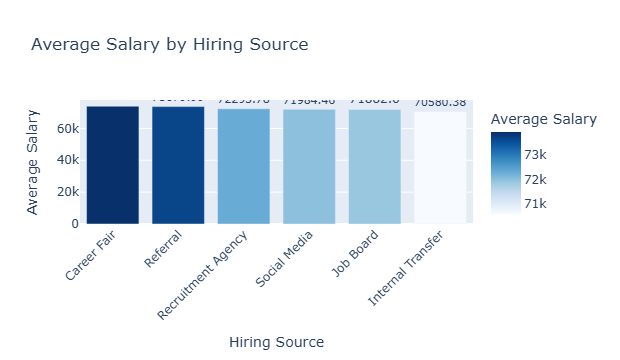

In [132]:
fig_sourcsal = px.bar(
    salary_by_source,
    x="hiring_source",
    y="avg_salary",
    text="avg_salary",
    color="avg_salary",
    title="Average Salary by Hiring Source",
    labels={"hiring_source": "Hiring Source", "avg_salary": "Average Salary"},
    color_continuous_scale="Blues"
)
fig_sourcsal.update_traces(textposition="outside")
fig_sourcsal.update_layout(xaxis_tickangle=-45)
fig_sourcsal.show()

##### **✅ Insight Summary – How Salary Varies Across Hiring Sources**
- **Highest Average Salaries**:
  - *Career Fair*: \$73,941.08
  - *Referral*: \$73,679.99
  - *Recruitment Agency*: \$72,295.78
- **Lowest Average Salaries**:
  - *Internal Transfer*: \$70,580.38
  - *Job Board*: \$71,882.60
  - *Social Media*: \$71,984.46

##### **💡 Interpretation:**
Career Fair and Referral hires continue to command the highest average salaries, reinforcing their role in attracting high-value talent. Interestingly, Recruitment Agency hires now show a notable rise in compensation, suggesting a shift toward more specialized or senior placements via external sourcing.
On the other hand, Internal Transfers now reflect the lowest average salary — potentially due to lateral moves, legacy compensation structures, or internal equity constraints. <br>
This analysis can help fine-tune hiring budgets, source high-value candidates efficiently, and align salary strategies with sourcing channels.

---

#### Strategic Workforce Analysis: Key Patterns & Actionable Insights

1️⃣ **Exit Tenure Comparison**  
Voluntary exits average 3.72 years, while involuntary exits average 3.67 years — a slight gap that may indicate disengagement or stagnation before voluntary departure. This highlights the need to strengthen mid-career engagement.

2️⃣ **Tenure vs. Exit Likelihood**  
Attrition risk rises with tenure, reaching 16.62% for employees with 5–7 years and peaking at 23.43% for those with 7+ years. This pattern underscores the importance of career progression and re-engagement strategies beyond year five.

3️⃣ **Bonus Eligibility vs. Performance Tier**  
Bonus eligibility is highest among Low performers (50.48%), followed by Moderate (49.39%) and Top performers (49.40%). This weak alignment between performance and rewards suggests a need to recalibrate incentive structures.

4️⃣ **Satisfaction Ratings vs. Performance**  
Moderate performers show the lowest counts across all satisfaction ratings (ranging from 59 to 83), suggesting they represent a smaller and potentially less stable evaluation group. Low performers are most common at mid-range satisfaction levels, peaking at 143 when the rating is 2, followed by 130 at rating 3. Their count drops to 105 at rating 1 and 113 at rating 5, indicating mixed engagement signals. Top performers show the highest count at satisfaction rating 3 (152), followed by 143 at rating 2, 133 at rating 4, 121 at rating 1, and 114 at rating 5 — suggesting strong performance exists across a wide range of satisfaction states.

5️⃣ **Fastest Roles to Promotion**  
Roles like Regional Sales Manager, Talent Acquisition Specialist, Controller, and Operations/Logistics Coordinator promote fastest (under 31 months).
Mid-range promotion speed is seen in Web Developer, Data Scientist, HR Manager, and HR Analyst (32–36 months).
Slower promotion tracks include Brand Manager, QA/Test Engineer, Network Administrator, and Marketing Manager (46–52+ months).

6️⃣ **Promotion Speed by Department**  
Departments with faster promotion cycles include HR, Operations, Legal, and Finance (32–37 months).
Slower promotion departments include Engineering, Sales, Marketing, and IT Support (38–40 months), indicating potential bottlenecks in career progression.

7️⃣ **Salary Growth After Promotion**  
The average salary increase post-promotion is ₹388.75, representing a modest 0.54% growth. While promotions still yield financial benefits, the impact is less pronounced — suggesting a need to reassess promotion-linked compensation strategies.

8️⃣ **Pay Equity Within Roles**  
Among the top 5 highest-paid roles, 4 are from Moderate performers and 1 from Low.
All 5 lowest-paid roles are held by Moderate performers, reinforcing that performance tier does not consistently correlate with compensation — a clear case for pay equity audits.

9️⃣ **Retention by Hiring Channel**  
Employees hired via Job Boards now show the longest average tenure at 4.76 years, followed closely by Social Media (4.67 years) and Referrals (4.66 years). Career Fair hires average 4.63 years, while Internal Transfers and Recruitment Agency hires trail slightly at 4.57 and 4.47 years respectively. These figures suggest that Job Board hires are currently the most stable, while Recruitment Agency hires may require closer scrutiny due to shorter retention.

🔟 **Salary by Hiring Channel**  
Career Fair hires command the highest average salary at ₹73.9k, followed by Referral (₹73.6k), Recruitment Agency (₹72.2k), Social Media (₹72k), Job Board (₹71.9k), and Internal Transfer (₹70.5k). This indicates that Career Fair and Referral channels are associated with higher compensation, while Internal Transfers tend to receive the lowest average salaries — highlighting potential disparities in sourcing channel value.

#### 📈 Business Recommendations

- 🔄 Re-engage employees post–5 years to reduce late-stage attrition
- 🎯 Recalibrate bonus structures to better reward top-tier performance
- 🧮 Conduct pay equity audits to align compensation with contribution
- 📢 Prioritize Career Fair and Referral sourcing for high-salary, longer-tenured hires
- 📊 Accelerate promotions in slow-growth departments and roles to boost motivation
- 🔍 Use satisfaction ratings as early churn signals, especially among high performers with low engagement
- 💰 Review promotion-linked salary policies, as financial impact is currently minimal
- 🔁 Reassess Recruitment Agency ROI, given lower retention despite higher salary costs

---